# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr , spearmanr

sns.set_theme(style='darkgrid')

# Read in local csv file and rename values

In [2]:
kentucky = pd.read_csv('kentucky.csv')

kentucky = kentucky.rename(columns={'year' : 'Year',
                                                  'county' : 'County',
                                                  'state' : 'State',
                                                  'povrate' : 'Poverty Rate',
                                                  'wagesal_percap' : 'Wages and Salary per Capita',
                                                  'trans_gov_pc' : 'Government Transfers per Capita',
                                                  'trans_medicare_pc' : 'Medicare Transfers per Capita',
                                                  'oldfrac' : 'Share of Population 65+',
                                                  'totalpop' : 'Total Population',
                                                  'trans_medicaid_pc' : 'Medicaid Transfers per Capita',
                                                  'unemprate' : 'Unemployment Rate'})

# Kentucky Dataset
- Years 2002 - 2019
- All Kentucky Counties
- Poverty Rate
- Wages and Salary per Capita
- Government Transfers per Capita (all government transfers)
- Medicare Transfers per Capita
- Share of Population 65+
- Total Population
- Medicaid Transfers per Capita
- Unemployment Rate

In [3]:
kentucky.head(15)

,Year,County,State,Poverty Rate,Wages and Salary per Capita,Government Transfers per Capita,Medicare Transfers per Capita,Share of Population 65+,Total Population,Medicaid Transfers per Capita,Unemployment Rate
0,2015,"Jefferson County, KY",21,15.4,33.507957,9.084407,2.130403,0.149360,764946,2.096687,4.8
1,2010,"Bullitt County, KY",21,10.5,8.515895,7.242966,1.688295,0.112443,74500,0.711899,10.6
2,2003,"Henry County, KY",21,12.7,8.604240,5.768100,1.374146,0.124844,15259,0.952066,5.3
3,2005,"Oldham County, KY",21,5.0,10.085989,3.747598,0.786488,0.075646,54266,0.595427,4.8
4,2009,"Oldham County, KY",21,5.9,9.899155,5.031501,1.107172,0.088880,59777,0.634520,8.3
5,2014,"Jefferson County, KY",21,16.8,31.422703,8.674019,2.055432,0.145697,761725,1.854879,6.0
6,2006,"Henry County, KY",21,15.4,8.485260,6.488068,1.759632,0.131373,15475,1.020675,5.7
7,2007,"Shelby County, KY",21,13.3,15.036273,5.282291,1.366415,0.114020,40335,0.643202,4.7
8,2002,"Bullitt County, KY",21,NaN,6.740033,4.353430,0.754777,0.081396,63775,0.683760,5.2
9,2019,"Jefferson County, KY",21,14.2,35.990448,9.287062,2.294696,0.166599,766757,1.991303,4.0


In [4]:
kentucky.shape

(2160, 11)

# Clean Data
- drop year 2002 because of null values in povrate
- change year column to date and format it to datetime with pandas
- fill na values in Poverty Rate column with the average

In [5]:
kentucky.drop(kentucky[kentucky['Year'] == '2002'].index, inplace=True)

In [6]:
kentucky['Date'] = pd.to_datetime(kentucky['Year'], format='%Y')

kentucky.drop('Year', inplace=True, axis=1)

kentucky = kentucky.fillna(kentucky['Poverty Rate'].mean())

# Create Poverty Rate Average from 2003 - 2019
- True being that the selected county's Poverty Rate is above the average from 2003-2019
- False being that the selected county's Poverty Rate is below the average from 2003-2019

In [7]:
kentucky_mean_pov = kentucky['Poverty Rate'].mean()
kentucky['Above Average Poverty Mean'] = (kentucky['Poverty Rate'] - kentucky_mean_pov) > 0

In [8]:
kentucky.sample(15)

,County,State,Poverty Rate,Wages and Salary per Capita,Government Transfers per Capita,Medicare Transfers per Capita,Share of Population 65+,Total Population,Medicaid Transfers per Capita,Unemployment Rate,Date,Above Average Poverty Mean
446,"Gallatin County, KY",21,16.7,11.299870,7.071012,1.351287,0.115188,8612,1.654017,12.3,2010-01-01,False
1031,"Garrard County, KY",21,16.1,4.980963,9.265148,2.566162,0.181118,17519,1.622779,4.5,2018-01-01,False
2053,"Cumberland County, KY",21,25.3,9.461975,15.191574,3.920220,0.214084,6731,5.570502,5.7,2016-01-01,True
1232,"Menifee County, KY",21,22.2,4.482834,7.256529,0.983323,0.125057,6581,1.807837,9.1,2003-01-01,True
1789,"Breathitt County, KY",21,33.9,8.678711,13.885751,2.840352,0.145191,13527,4.049816,14.9,2013-01-01,True
1678,"Knox County, KY",21,26.5,9.061430,8.206831,1.175556,0.127805,31376,2.195596,7.6,2003-01-01,True
1267,"Morgan County, KY",21,25.9,7.892709,7.531739,1.915701,0.127557,14174,1.725194,8.7,2006-01-01,True
473,"Pendleton County, KY",21,15.6,6.928142,8.504068,2.315688,0.145966,14476,1.402329,6.7,2014-01-01,False
657,"Graves County, KY",21,20.5,10.995718,9.109579,2.299640,0.163041,36862,1.581843,6.9,2008-01-01,True
17,"Bullitt County, KY",21,9.6,10.897093,7.764421,2.154887,0.142685,78677,1.081616,4.5,2015-01-01,False


# Data Visualization
- relation between Unemployment Rate and Poverty Rate within counties
- 

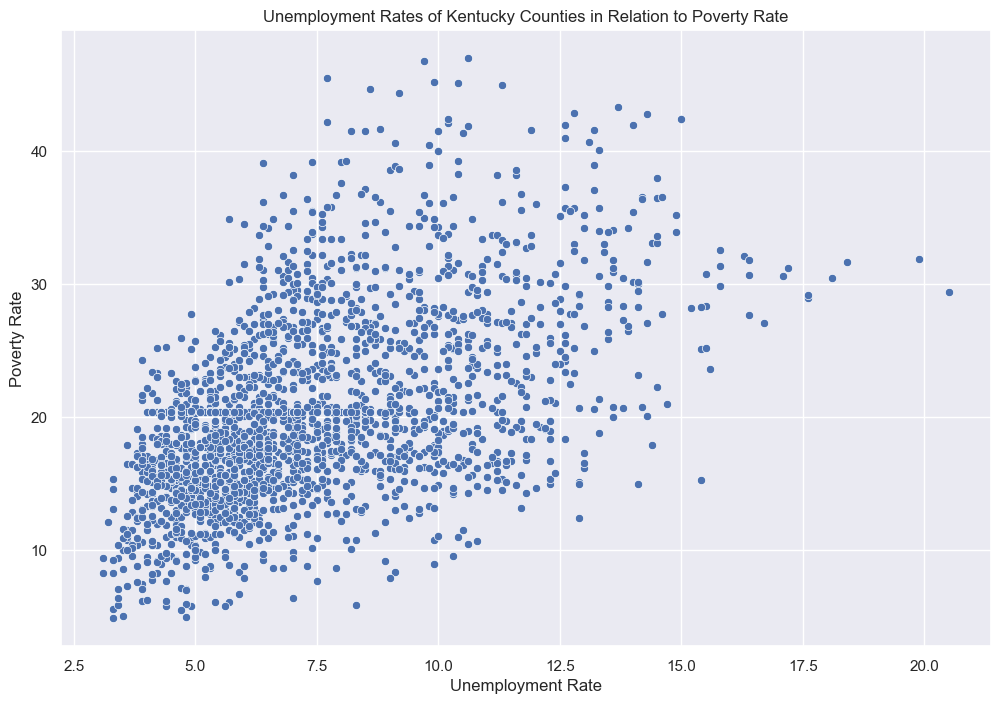

In [9]:
plt.figure(figsize=(12,8))

sns.scatterplot(x= 'Unemployment Rate',
                y= 'Poverty Rate',
                data= kentucky)
plt.title('Unemployment Rates of Kentucky Counties in Relation to Poverty Rate')

plt.show()

/var/folders/02/lzvd5scj4zb274qzdzm7r7p80000gn/T/ipykernel_97760/2672761569.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x= 'Poverty Rate',


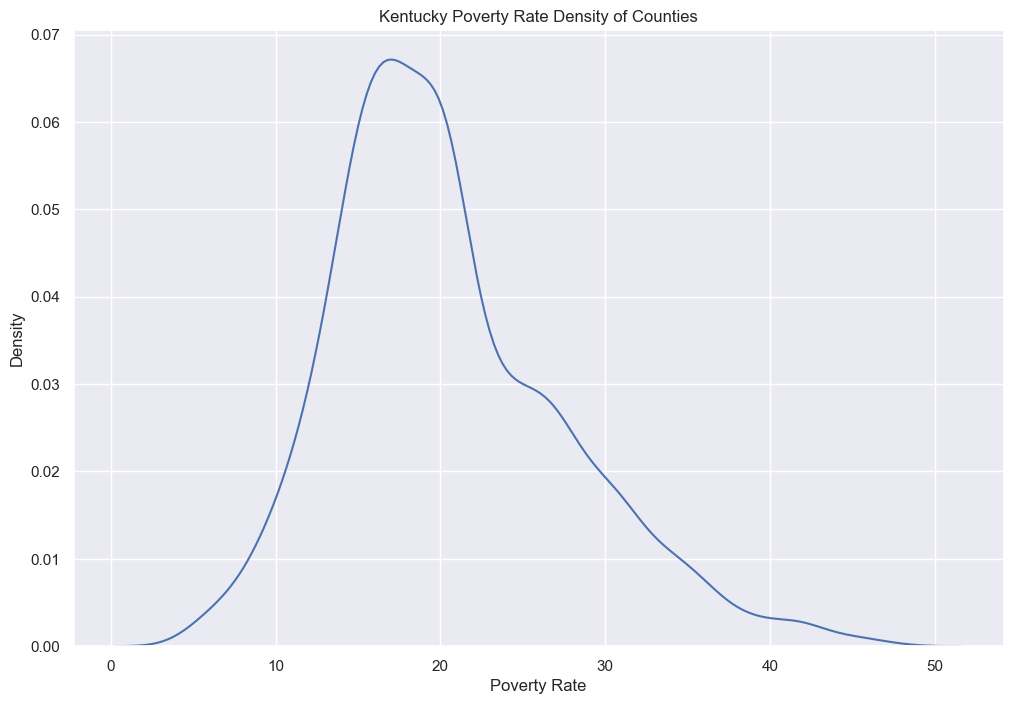

In [10]:
plt.figure(figsize=(12,8))

sns.kdeplot(x= 'Poverty Rate',
            data= kentucky,
             shade=False)

plt.title('Kentucky Poverty Rate Density of Counties')

plt.show()

/var/folders/02/lzvd5scj4zb274qzdzm7r7p80000gn/T/ipykernel_97760/1116232922.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x= 'Date',


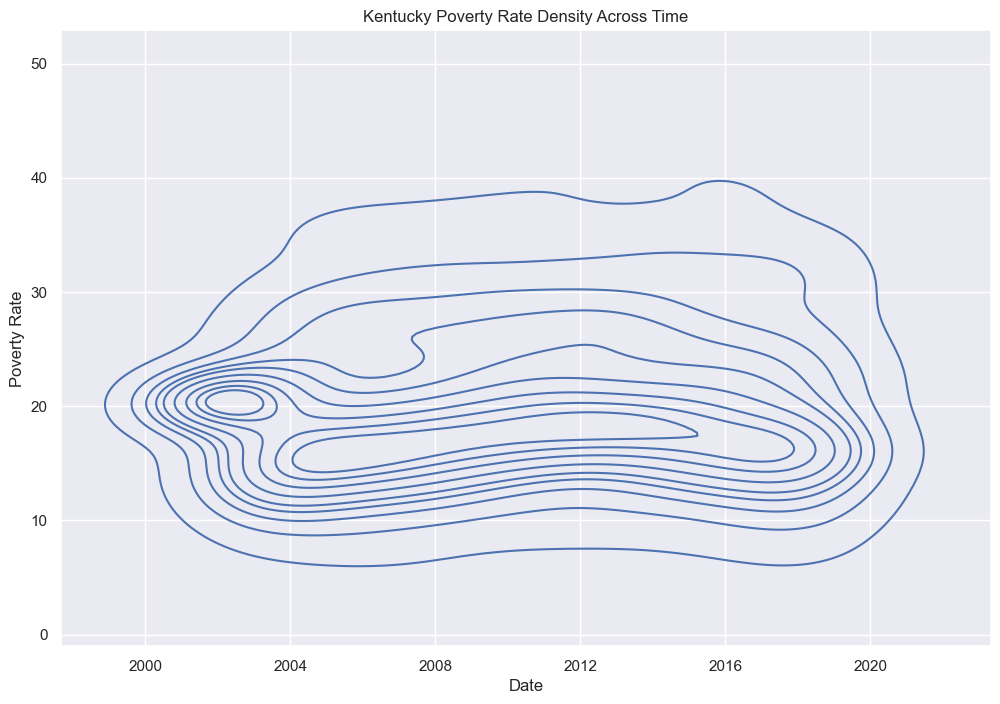

In [11]:
plt.figure(figsize=(12,8))

sns.kdeplot(x= 'Date',
            y= 'Poverty Rate',
            data= kentucky,
             shade=False)

plt.title('Kentucky Poverty Rate Density Across Time')

plt.show()

# Create readable values for machine learning model
- True values in Above Average Poverty Mean are represented by 1
- False values in Above Average Poverty Mean are represented by 0

In [12]:
pov_map = {True : 1, False : 0}

kentucky['Above Average Poverty Mean'] = kentucky['Above Average Poverty Mean'].map(pov_map)

num_true_kentucky = len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1])
num_false_kentucky = len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0])

# Split the data for learning model and testing model
- Using sklearn the model splits the data into two different training sets and two different test sets.
- Features of the counties the predictive model will be judging on:
    - Wages and Salary per Capita
    - Government Transfers per Capita
    - Meidcare Transfers per Capita
    - Share of Population 65+
    - Total Population
    - Medicaid Transfers per Capita
    - Unemployment Rate
- The model will read selected features and make a prediction if a county will be above the Average Poverty Mean.

In [13]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Wages and Salary per Capita', 'Government Transfers per Capita', 'Medicare Transfers per Capita', 'Share of Population 65+', 'Total Population', 'Medicaid Transfers per Capita', 'Unemployment Rate']
predicted_class_name = ['Above Average Poverty Mean']

X = kentucky[feature_col_names].values
y = kentucky[predicted_class_name].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(kentucky.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(kentucky.index)) * 100))

70.00% in training set
30.00% in test set


In [ ]:
print("Original True  : {0} ({1:0.2f}%)".format(len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1]), (len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1])/len(kentucky.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0]), (len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0])/len(kentucky.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 839 (38.84%)
Original False : 1321 (61.16%)

Training True  : 595 (39.35%)
Training False : 917 (60.65%)

Test True      : 244 (37.65%)
Test False     : 404 (62.35%)


# Naive Bayes Model
- Create Gaussian Naive Bayes model object and train it with the data

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

# Predict values using the training data and import the performance metrics library for accuracy

In [ ]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.6442


# Predict values using the testing data and use metrics library for accuracy

In [ ]:
nb_predict_test = nb_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.6420


In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[191 213]
 [ 19 225]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.47      0.62       404
           1       0.51      0.92      0.66       244

    accuracy                           0.64       648
   macro avg       0.71      0.70      0.64       648
weighted avg       0.76      0.64      0.64       648



# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pov_model = LinearRegression(normalize=True)

pov_model.fit(X_train, y_train)
y_pred = pov_model.predict(X_test)
print(r2_score(y_test, y_pred))

0.48408785057861303


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
